# –ß—Ç–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud
#import nltk
#from nltk.corpus import stopwords

In [9]:
filename = 'geo-reviews-dataset-2023.tskv'

all_records = []

with open(filename, 'r', encoding='utf-8') as f:
    for line in f:
        if not line.strip():
            continue
            
        record_dict = {}
        
        pairs = line.strip().split('\t')
        
        for pair in pairs:
            try:
                key, value = pair.split('=', 1)
                record_dict[key] = value
            except ValueError:
                pass
                
        all_records.append(record_dict)

df = pd.DataFrame(all_records)

df.head()


address             name_ru  \
0  –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª. –ú–æ—Å–∫–æ–≤—Å–∫–∞—è / —É–ª. –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫...  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª   
1  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≠–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω...   –ü—Ä–æ–¥—É–∫—Ç—ã –ï—Ä–º–æ–ª–∏–Ω–æ   
2  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ü—Ä–∏–∫—É–±–∞–Ω—Å–∫–∏–π –≤–Ω—É—Ç—Ä–∏–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥,...             LimeFit   
3   –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ø—Ä–æ—Å–ø–µ–∫—Ç –≠–Ω–≥–µ–ª—å—Å–∞, 111, –∫–æ—Ä–ø. 1        Snow-Express   
4                  –¢–≤–µ—Ä—å, –í–æ–ª–æ–∫–æ–ª–∞–º—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 39  –°—Ç—É–¥–∏—è Beauty Brow   

  rating                                            rubrics  \
0     3.                                     –ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å   
1     5.  –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤;–ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫–∏;...   
2     1.                                        –§–∏—Ç–Ω–µ—Å-–∫–ª—É–±   
3     4.        –ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞;–ü—Ä–æ–∫–∞—Ç –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤;–°–∞–ø—Å—ë—Ä—Ñ–∏–Ω–≥   
4     5.  –°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã;–í–∏–∑–∞–∂–∏—Å—Ç—ã, —Å—Ç–∏–ª–∏—Å—Ç—ã;–°–∞–ª–æ–Ω –±—Ä–æ–≤–µ–π...   

                                                text  
0  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª 2.\n–®—É–º–Ω–æ : –ª–µ—Ç–æ–º –ø–æ –Ω–æ—á–∞–º ...  
1  –ó–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è —Å–µ—Ç—å –º–∞–≥–∞–∑–∏–Ω–æ–≤ –≤ –æ–±—â–µ–º, —Ö–æ—Ä–æ—à–∏–π ...  
2  –ù–µ –∑–Ω–∞—é —Å–º—É—Ç—è—Ç –ª–∏ –∫–æ–≥–æ-—Ç–æ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞, –Ω–æ —è...  
3  –•–æ—Ä–æ—à–∏–µ —É—Å–ª–æ–≤–∏—è –∞—Ä–µ–Ω–¥—ã. \n–î—Ä—É–∂–µ–ª—é–±–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª...  
4  –¢–æ–ø –º–∞—Å—Ç–µ—Ä –ê–Ω–≥–µ–ª–∏–Ω–∞ —Ç–æ–ø –≤–æ –≤—Å–µ—Ö —Å–º—ã—Å–ª–∞—Ö ) –ù–µ–º–Ω...

# EDA

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–æ—Å—Ç–∞–≤ –¥–∞–Ω–Ω—ã—Ö

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   address  500000 non-null  object
 1   name_ru  499030 non-null  object
 2   rating   500000 non-null  object
 3   rubrics  500000 non-null  object
 4   text     500000 non-null  object
dtypes: object(5)
memory usage: 19.1+ MB


## –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ç–∏–ø–æ–≤

In [25]:
df['rating'] = pd.to_numeric(df['rating'])
df['rating'].value_counts(dropna=False)

rating
5.0    390515
4.0     41160
1.0     34351
3.0     21686
2.0     12088
0.0       200
Name: count, dtype: int64

## –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤

–í–∏–¥–∏–º, —á—Ç–æ —É 970 –æ—Ç–∑—ã–≤–æ–≤ –Ω–µ—Ç –Ω–∞–∑–≤–∞–Ω–∏—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π, –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ

In [ ]:
df[df['name_ru'].isna()]

address name_ru rating  \
322        –ú–æ—Å–∫–≤–∞, 8-—è —É–ª–∏—Ü–∞ –°–æ–∫–æ–ª–∏–Ω–æ–π –ì–æ—Ä—ã, 15–ê, —Å—Ç—Ä. 23     NaN     5.   
5716    –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...     NaN     5.   
5717    –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...     NaN     5.   
5718    –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...     NaN     5.   
5719    –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...     NaN     5.   
...                                                   ...     ...    ...   
498536  –†–µ—Å–ø—É–±–ª–∏–∫–∞ –ë–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω, –£—Ñ–∞, —É–ª–∏—Ü–∞ –ú–µ–Ω–¥–µ–ª–µ–µ–≤–∞...     NaN     5.   
498688  –ú–æ—Å–∫–≤–∞, –Æ–≥–æ-–í–æ—Å—Ç–æ—á–Ω—ã–π –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–∏–≤–Ω—ã–π –æ–∫—Ä—É–≥, ...     NaN     5.   
498913  –°–∞–º–∞—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –í–æ–ª–∂—Å–∫–∏–π —Ä–∞–π–æ–Ω, –∂–∏–ª–æ–π —Ä–∞–π–æ–Ω...     NaN     1.   
499006                      –í–æ–ª–≥–æ–≥—Ä–∞–¥, —É–ª–∏—Ü–∞ –ì—Ä–æ—Å—Å–º–∞–Ω–∞, 6     NaN     5.   
499997           –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫, –ö–æ–º–º—É–Ω–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —É–ª–∏—Ü–∞, 48–ê     NaN     5.   

                                                  rubrics  \
322                                      –û—Ñ–∏—Å –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏   
5716                                            –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞   
5717                                            –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞   
5718                                            –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞   
5719                                            –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞   
...                                                   ...   
498536                  –°–∫–∞–ª–æ–¥—Ä–æ–º;–°–ø–æ—Ä—Ç–∏–≤–Ω—ã–π –∫–ª—É–±, —Å–µ–∫—Ü–∏—è   
498688  –ò–∑–≥–æ—Ç–æ–≤–ª–µ–Ω–∏–µ –ø–∞–º—è—Ç–Ω–∏–∫–æ–≤ –∏ –Ω–∞–¥–≥—Ä–æ–±–∏–π;–ò–∑–¥–µ–ª–∏—è –∏–∑...   
498913  –ú–∞–≥–∞–∑–∏–Ω —Ü–≤–µ—Ç–æ–≤;–ö–æ–ø–∏—Ä–æ–≤–∞–ª—å–Ω—ã–π —Ü–µ–Ω—Ç—Ä;–¢–æ–≤–∞—Ä—ã –¥–ª—è ...   
499006                                      –°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã   
499997                                           –ë–∞—Ä, –ø–∞–±   

                                                     text  
322     –†–µ–±—è—Ç–∞ –ø—Ä–æ—Ñ–∏!\n\n–û—Ç–ª–∏—á–Ω–æ –ø–æ–¥–æ–±—Ä–∞–ª–∏ –º–æ–¥–µ–ª—å, —Å—ä–µ...  
5716    –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Ö–æ—Ä–æ—à–∞—è, —É–¥–æ–±–Ω–æ —Ä–∞—Å–ø–æ–ª...  
5717    –ë—ã–ª –∑–¥–µ—Å—å –Ω–∞ –∫—É–ª–∏–Ω–∞—Ä–Ω–æ–º –º–∞—Å—Ç–µ—Ä-–∫–ª–∞—Å—Å–µ. –ú–µ—Å—Ç–æ –∞...  
5718    –¢–∏—Ö–æ–µ –º–µ—Å—Ç–æ, –≤ –≤—ã—Ö–æ–¥–Ω—ã–µ –≤–æ–∑–º–æ–∂–Ω–æ –∏ —à—É–º–Ω–æ —Ç–∞–∫ –∫...  
5719    –í–æ—Å–ø–∏—Ç–∞–Ω–Ω—ã–µ –∏ –æ—Ç–∑—ã–≤—á–∏–≤—ã–µ –æ—Ñ–∏—Ü–∏–∞–Ω—Ç—ã , –≤–∫—É—Å–Ω–∞—è –∫...  
...                                                   ...  
498536  –ë—ã–ª–∏ —Å –¥–µ—Ç—å–º–∏ –Ω–∞ 8 –º–∞—Ä—Ç–∞. –ü—Ä–∏–µ—Ö–∞–ª–∏ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ ...  
498688  –û—Ç–ª–∏—á–Ω–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ –º–∞—Ç–µ—Ä–∏–∞–ª–∞, –ø—Ä–µ–∫—Ä–∞—Å–Ω–æ–µ –∏—Å–ø–æ–ª–Ω...  
498913  –¶–µ–Ω –Ω–∞ —Ü–≤–µ—Ç—ã –∫–æ—Ç–æ—Ä—ã–µ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –Ω–∞ –≤–∏—Ç—Ä–∏–Ω–µ –Ω–µ—Ç,...  
499006  –ö–≤–∞–ª–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –º–∞—Å—Ç–µ—Ä–∞. –†–∞–±–æ—Ç—É –≤—ã–ø–æ–ª–Ω—è—é—Ç —Å ...  
499997  –ü—Ä–∏—è—Ç–Ω–∞—è –∞—Ç–º–æ—Å—Ñ–µ—Ä–∞, –ø—Ä–µ–∫—Ä–∞—Å–Ω–æ–µ –≤–∏–Ω–æ, –≤–æ–ª—à–µ–±–Ω–∞—è...  

[970 rows x 5 columns]

–°—É–¥—è –ø–æ –∞–¥—Ä–µ—Å–∞–º —Ç–∞–∫–∏—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π 576 - –≤—Ä—É—á–Ω—É—é –Ω–∞–π—Ç–∏ –∏ –ø—Ä–æ—Å—Ç–∞–≤–∏—Ç—å –Ω–∞–∑–≤–∞–Ω–∏—è –±—É–¥–µ—Ç —Å–ª–æ–∂–Ω–æ

In [18]:
df[df['name_ru'].isna()]['address'].value_counts()

address
–ù–æ–≤–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, 49–ù-1234                                                                16
–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, —É–ª–∏—Ü–∞ –†–µ–Ω—Ç–≥–µ–Ω–∞, 19                                                           16
–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ö–∞—Ä–µ–ª–∏—è, –ü–µ—Ç—Ä–æ–∑–∞–≤–æ–¥—Å–∫, —É–ª–∏—Ü–∞ –§–µ–¥–æ—Å–æ–≤–æ–π, 30                                         13
–ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π, –°–æ—á–∏, –º–∏–∫—Ä–æ—Ä–∞–π–æ–Ω –¶–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–π, –ù–∞–≤–∞–≥–∏–Ω—Å–∫–∞—è —É–ª–∏—Ü–∞, 11, –∫–æ—Ä–ø. 5              12
–ù–æ–≤–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –û–∫—É–ª–æ–≤—Å–∫–∏–π —Ä–∞–π–æ–Ω, –¢—É—Ä–±–∏–Ω–Ω–æ–µ —Å–µ–ª—å—Å–∫–æ–µ –ø–æ—Å–µ–ª–µ–Ω–∏–µ, –ú-11, 423-–π –∫–∏–ª–æ–º–µ—Ç—Ä    11
                                                                                              ..
–ú–æ—Å–∫–≤–∞, –î—É–±–∏–Ω–∏–Ω—Å–∫–∞—è —É–ª–∏—Ü–∞, 67–∫2                                                                1
–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ö–æ–º–∏, –°—ã–∫—Ç—ã–≤–∫–∞—Ä, –°—ã—Å–æ–ª—å—Å–∫–

–ù–æ –º—ã –º–æ–∂–µ–º –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, –≤–¥—Ä—É–≥ –µ—Å—Ç—å —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –∞–¥—Ä–µ—Å –ø—Ä–æ—Å—Ç–∞–≤–ª–µ–Ω, —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Ä—É–±—Ä–∏–∫–∞ –∏ –µ—Å—Ç—å –Ω–∞–∑–≤–∞–Ω–∏–µ

In [26]:
df_with_names = df.dropna(subset=['name_ru'])

In [35]:
address_to_name_map = df_with_names.drop_duplicates(subset=['address', 'rubrics']).set_index(['address', 'rubrics'])['name_ru']

In [37]:
address_to_name_map.head()

address                                                                                                           rubrics                                                           
–ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª. –ú–æ—Å–∫–æ–≤—Å–∫–∞—è / —É–ª. –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫–∞—è / —É–ª. –ü–µ—á–∞—Ç–Ω–∏–∫–æ–≤                                                 –ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å                                                        –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª
–ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≠–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω–∏–Ω–∞, 29                                                             –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤;–ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫–∏;–ú–∞–≥–∞–∑–∏–Ω –º—è—Å–∞, –∫–æ–ª–±–∞—Å     –ü—Ä–æ–¥—É–∫—Ç—ã –ï—Ä–º–æ–ª–∏–Ω–æ
–ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ü—Ä–∏–∫—É–±–∞–Ω—Å–∫–∏–π –≤–Ω—É—Ç—Ä–∏–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥, –º–∏–∫—Ä–æ—Ä–∞–π–æ–Ω –∏–º–µ–Ω–∏ –ü–µ—Ç—Ä–∞ –ú–µ—Ç–∞–ª—å–Ω–∏–∫–æ–≤–∞, —É–ª–∏—Ü–∞ –ü–µ—Ç—Ä–∞ –ú–µ—Ç–∞–ª—å–Ω–∏–∫–æ–≤–∞, 26  –§–∏—Ç

In [39]:
address_to_name_map.shape

(272722,)

272 722 –∏–∑–≤–µ—Å—Ç–Ω—ã–µ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏

In [ ]:
rows_to_fill = df['name_ru'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
499995    False
499996    False
499997     True
499998    False
499999    False
Name: name_ru, Length: 500000, dtype: bool

In [45]:
df.loc[rows_to_fill, 'address'].map(address_to_name_map).dropna()

Series([], Name: address, dtype: object)

–ü–æ–Ω–∏–º–∞–µ–º, —á—Ç–æ –∞–¥—Ä–µ—Å–∞ –ø—É—Å—Ç—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π –Ω–∏–≥–¥–µ –Ω–µ –ø–æ–≤—Ç–æ—Ä—è—é—Ç—Å—è, –≥–¥–µ –Ω–∞–∑–≤–∞–Ω–∏—è –µ—Å—Ç—å. –¢–∞–∫ –∫–∞–∫ –Ω–∞–º –Ω–µ –æ—Å–æ–±–æ –≤–∞–∂–Ω–æ –Ω–∞–∑–≤–∞–Ω–∏–µ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏, –∞ –≤—Å–µ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –ø–æ –Ω–∏–º –µ—Å—Ç—å, –¥–∞–≤–∞–π—Ç–µ —Å–≥—Ä—É–ø–ø–∏—Ä—É–µ–º –∏—Ö –ø–æ –∞–¥—Ä–µ—Å—É –∏ —Ä—É–±—Ä–∏–∫–µ (—Å –±–æ–ª—å—à–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é —ç—Ç–æ –æ–¥–Ω–∞ –∏ —Ç–∞ –∂–µ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è) –∏ –¥–∞–¥–∏–º –Ω–∞–∑–≤–∞–Ω–∏–µ "–ù–µ–∏–∑–≤–µ—Å—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è N" - –≥–¥–µ N –ø—Ä–æ—Å—Ç–æ –Ω–æ–º–µ—Ä 

–ù–∞ –≤—Å—è–∫–∏–π –ø—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ –Ω–µ—Ç –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π —Å –ø–æ—Ö–æ–∂–∏–º–∏ –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏

In [48]:
df[df['name_ru'].str.contains("–ù–µ–∏–∑–≤–µ—Å—Ç–Ω–∞—è") == True]

Empty DataFrame
Columns: [address, name_ru, rating, rubrics, text]
Index: []

In [52]:
df_without_names = df[df['name_ru'].isna()]
df_without_names['key'] = df['address'] + df['rubrics']
df_without_names.head()

/var/folders/wj/jzwd6lfn7xx02ns8v_wr29bm0000gn/T/ipykernel_25010/3864129646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_names['key'] = df['address'] + df['rubrics']


address name_ru  rating  \
322      –ú–æ—Å–∫–≤–∞, 8-—è —É–ª–∏—Ü–∞ –°–æ–∫–æ–ª–∏–Ω–æ–π –ì–æ—Ä—ã, 15–ê, —Å—Ç—Ä. 23     NaN     5.0   
5716  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...     NaN     5.0   
5717  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...     NaN     5.0   
5718  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...     NaN     5.0   
5719  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...     NaN     5.0   

               rubrics                                               text  \
322   –û—Ñ–∏—Å –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏  –†–µ–±—è—Ç–∞ –ø—Ä–æ—Ñ–∏!\n\n–û—Ç–ª–∏—á–Ω–æ –ø–æ–¥–æ–±—Ä–∞–ª–∏ –º–æ–¥–µ–ª—å, —Å—ä–µ...   
5716         –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞  –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Ö–æ—Ä–æ—à–∞—è, —É–¥–æ–±–Ω–æ —Ä–∞—Å–ø–æ–ª...   
5717         –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞  –ë—ã–ª –∑–¥–µ—Å—å –Ω–∞ –∫—É–ª–∏–Ω–∞—Ä–Ω–æ–º –º–∞—Å—Ç–µ—Ä-–∫–ª–∞—Å—Å–µ. –ú–µ—Å—Ç–æ –∞...   
5718         –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞  –¢–∏—Ö–æ–µ –º–µ—Å—Ç–æ, –≤ –≤—ã—Ö–æ–¥–Ω—ã–µ –≤–æ–∑–º–æ–∂–Ω–æ –∏ —à—É–º–Ω–æ —Ç–∞–∫ –∫...   
5719         –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞  –í–æ—Å–ø–∏—Ç–∞–Ω–Ω—ã–µ –∏ –æ—Ç–∑—ã–≤—á–∏–≤—ã–µ –æ—Ñ–∏—Ü–∏–∞–Ω—Ç—ã , –≤–∫—É—Å–Ω–∞—è –∫...   

                                                    key  
322   –ú–æ—Å–∫–≤–∞, 8-—è —É–ª–∏—Ü–∞ –°–æ–∫–æ–ª–∏–Ω–æ–π –ì–æ—Ä—ã, 15–ê, —Å—Ç—Ä. 23...  
5716  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...  
5717  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...  
5718  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...  
5719  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...

In [56]:
unique_missing_keys = df_without_names['key'].unique()
key_to_generated_name_map = {key: f"–ù–µ–∏–∑–≤–µ—Å—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è ‚Ññ{i}" for i, key in enumerate(unique_missing_keys, 1)}

In [58]:
df['key'] = df['address'] + df['rubrics']
df.loc[rows_to_fill, 'name_ru'] = df.loc[rows_to_fill, 'key'].map(key_to_generated_name_map)
df.head()

address             name_ru  \
0  –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª. –ú–æ—Å–∫–æ–≤—Å–∫–∞—è / —É–ª. –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫...  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª   
1  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≠–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω...   –ü—Ä–æ–¥—É–∫—Ç—ã –ï—Ä–º–æ–ª–∏–Ω–æ   
2  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ü—Ä–∏–∫—É–±–∞–Ω—Å–∫–∏–π –≤–Ω—É—Ç—Ä–∏–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥,...             LimeFit   
3   –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ø—Ä–æ—Å–ø–µ–∫—Ç –≠–Ω–≥–µ–ª—å—Å–∞, 111, –∫–æ—Ä–ø. 1        Snow-Express   
4                  –¢–≤–µ—Ä—å, –í–æ–ª–æ–∫–æ–ª–∞–º—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 39  –°—Ç—É–¥–∏—è Beauty Brow   

   rating                                            rubrics  \
0     3.0                                     –ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å   
1     5.0  –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤;–ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫–∏;...   
2     1.0                                        –§–∏—Ç–Ω–µ—Å-–∫–ª—É–±   
3     4.0        –ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞;–ü—Ä–æ–∫–∞—Ç –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤;–°–∞–ø—Å—ë—Ä—Ñ–∏–Ω–≥   
4     5.0  –°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã;–í–∏–∑–∞–∂–∏—Å—Ç—ã, —Å—Ç–∏–ª–∏—Å—Ç—ã;–°–∞–ª–æ–Ω –±—Ä–æ–≤–µ–π...   

                                                text  \
0  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª 2.\n–®—É–º–Ω–æ : –ª–µ—Ç–æ–º –ø–æ –Ω–æ—á–∞–º ...   
1  –ó–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è —Å–µ—Ç—å –º–∞–≥–∞–∑–∏–Ω–æ–≤ –≤ –æ–±—â–µ–º, —Ö–æ—Ä–æ—à–∏–π ...   
2  –ù–µ –∑–Ω–∞—é —Å–º—É—Ç—è—Ç –ª–∏ –∫–æ–≥–æ-—Ç–æ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞, –Ω–æ —è...   
3  –•–æ—Ä–æ—à–∏–µ —É—Å–ª–æ–≤–∏—è –∞—Ä–µ–Ω–¥—ã. \n–î—Ä—É–∂–µ–ª—é–±–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª...   
4  –¢–æ–ø –º–∞—Å—Ç–µ—Ä –ê–Ω–≥–µ–ª–∏–Ω–∞ —Ç–æ–ø –≤–æ –≤—Å–µ—Ö —Å–º—ã—Å–ª–∞—Ö ) –ù–µ–º–Ω...   

                                                 key  
0  –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª. –ú–æ—Å–∫–æ–≤—Å–∫–∞—è / —É–ª. –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫...  
1  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≠–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω...  
2  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ü—Ä–∏–∫—É–±–∞–Ω—Å–∫–∏–π –≤–Ω—É—Ç—Ä–∏–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥,...  
3  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ø—Ä–æ—Å–ø–µ–∫—Ç –≠–Ω–≥–µ–ª—å—Å–∞, 111, –∫–æ—Ä–ø....  
4  –¢–≤–µ—Ä—å, –í–æ–ª–æ–∫–æ–ª–∞–º—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 39–°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã...

In [61]:
df = df.drop(columns=['key'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   address  500000 non-null  object 
 1   name_ru  500000 non-null  object 
 2   rating   500000 non-null  float64
 3   rubrics  500000 non-null  object 
 4   text     500000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 19.1+ MB


–¢–µ–ø–µ—Ä—å –≤—Å–µ –¥–∞–Ω–Ω—ã–µ –Ω–µ –ø—É—Å—Ç—ã–µ

# –ê–Ω–∞–ª–∏—Ç–∏–∫–∞

## –†—É–±—Ä–∏–∫–∏

In [66]:
df_rubrics = df.copy()
df_rubrics['rubrics_list'] = df_rubrics['rubrics'].str.split(';')

exploded_rubrics = df_rubrics.explode('rubrics_list')

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫–∏—Ö —Ä—É–±—Ä–∏–∫ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ

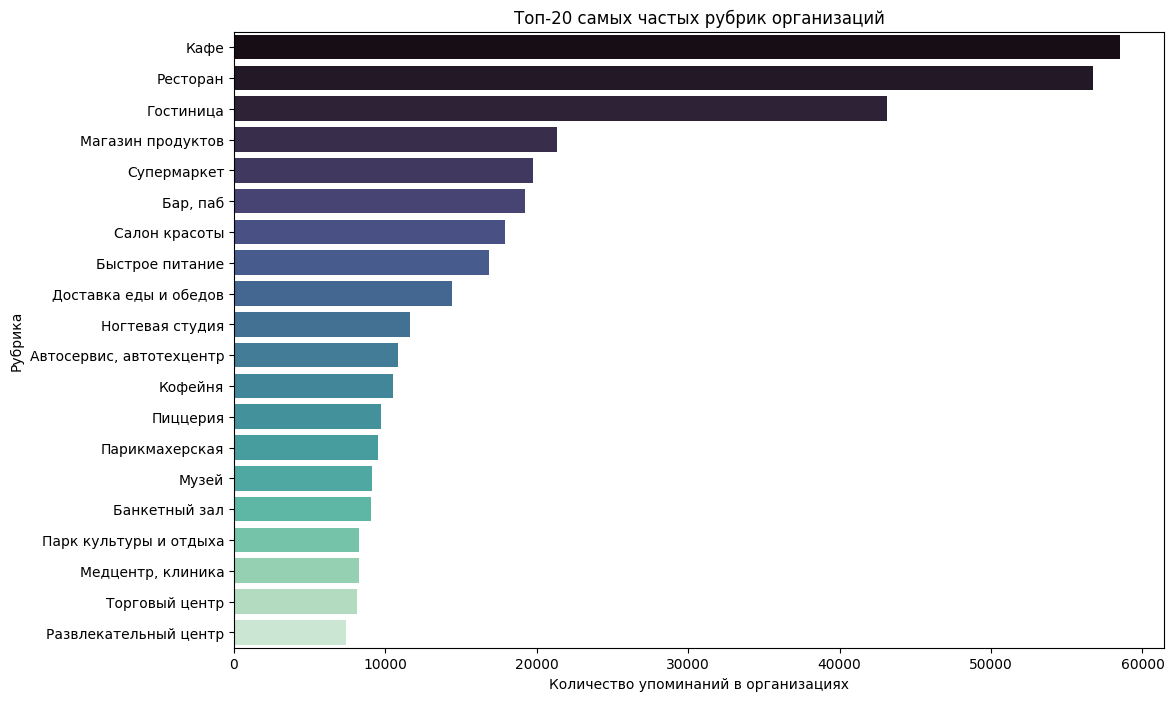

In [87]:
top_rubrics = exploded_rubrics['rubrics_list'].value_counts().nlargest(20)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_rubrics.index, x=top_rubrics.values, palette='mako',  hue=top_rubrics.index)
plt.title('–¢–æ–ø-20 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Ä—É–±—Ä–∏–∫ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–ø–æ–º–∏–Ω–∞–Ω–∏–π –≤ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è—Ö')
plt.ylabel('–†—É–±—Ä–∏–∫–∞')
plt.show()

–ò —Å–∫–æ–ª—å–∫–æ –∏—Ö –≤–æ–æ–±—â–µ –º–æ–∂–µ—Ç –±—ã—Ç—å

In [70]:
len(exploded_rubrics['rubrics_list'].unique())

1370

In [72]:
df.sample(20)

address  \
136788  –ò–≤–∞–Ω–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ü—Ä–∏–≤–æ–ª–∂—Å–∫, —É–ª–∏—Ü–∞ –ö—É–π–±—ã—à–µ–≤–∞, 2   
251448            –ú–æ—Å–∫–≤–∞, –ø—Ä–æ–µ–∑–¥ –°–µ—Ä–µ–±—Ä—è–∫–æ–≤–∞, 14–ë, —Å—Ç—Ä. 4   
43635                     –ü—Å–∫–æ–≤, –û–∫—Ç—è–±—Ä—å—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 38   
423324  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥ –î–æ–º–æ–¥–µ–¥–æ–≤–æ...   
194388  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π, —Å—Ç–∞–Ω–∏—Ü–∞ –õ–µ–Ω–∏–Ω–≥—Ä–∞–¥—Å–∫–∞—è, –ö—Ä–µ...   
282586  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ë–∞–ª–∞—à–∏—Ö–∞, –º–∏–∫—Ä–æ—Ä–∞–π–æ–Ω –û–ª—å–≥–∏...   
389518                 –ú–æ—Å–∫–≤–∞, –õ–µ–Ω–∏–Ω–≥—Ä–∞–¥—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 63   
470579  –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª–∏—Ü–∞ –ú–µ—Ç–∞...   
91331   –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –Ω–∞–±–µ—Ä–µ–∂–Ω–∞—è –ê–¥–º–∏—Ä–∞–ª—Ç–µ–π—Å–∫–æ–≥–æ –∫–∞...   
74783   –†–µ—Å–ø—É–±–ª–∏–∫–∞ –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω, –ù–∞–±–µ—Ä–µ–∂–Ω—ã–µ –ß–µ–ª–Ω—ã, –ø—Ä–æ—Å–ø–µ...   
271433  –†–µ—Å–ø—É–±–ª–∏–∫–∞ –ë–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω, –£—Ñ–∞, —É–ª–∏—Ü–∞ 50-–ª–µ—Ç–∏—è –û...   
260008  –ß—É–≤–∞—à—Å–∫–∞—è –†–µ—Å–ø—É–±–ª–∏–∫–∞, –ß–µ–±–æ–∫—Å–∞—Ä—ã, —É–ª–∏—Ü–∞ –õ–µ–Ω–∏–Ω—Å–∫...   
320770          –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É, –ë—É–¥—ë–Ω–Ω–æ–≤—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 59   
489235  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –õ–µ–Ω–∏–Ω—Å–∫–∏–π –≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥,...   
74935                    –¢—é–º–µ–Ω—å, —É–ª–∏—Ü–∞ 50 –ª–µ—Ç –û–∫—Ç—è–±—Ä—è, 14   
162116  –†–µ—Å–ø—É–±–ª–∏–∫–∞ –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω, –ö–∞–∑–∞–Ω—å, –û—Å–∏–Ω–æ–≤—Å–∫–∞—è —É–ª–∏—Ü–∞...   
258505  –°–µ–≤–∞—Å—Ç–æ–ø–æ–ª—å, –ë–∞–ª–∞–∫–ª–∞–≤—Å–∫–∏–π —Ä–∞–π–æ–Ω, –û—Ä–ª–∏–Ω–æ–≤—Å–∫–∏–π –º...   
244907  –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª–∏—Ü–∞ –©–æ—Ä—Å...   
272612              –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ù–µ–≤—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 88   
171483                 –ú–æ—Å–∫–≤–∞, –õ–µ–Ω–∏–Ω–≥—Ä–∞–¥—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 48   

                         name_ru  rating  \
136788                 –°–æ–Ω & –õ—ë–Ω     5.0   
251448                  –°—Ç–∞—Ä—Ç–µ–∫—Å     5.0   
43635            –ö–æ—Ñ–µ —Å –ö–∏–∫–æ–∏–Ω—ã–º     5.0   
423324                –ø–∞—Ä–∫ –í–∑–ª—ë—Ç     1.0   
194388                  Imperium     5.0   
282586                     –ú–æ–∫–∫–æ     5.0   
389518                Laser Love     5.0   
470579                      Nori     5.0   
91331     –û—Å—Ç—Ä–æ–≤ –ù–æ–≤–∞—è –ì–æ–ª–ª–∞–Ω–¥–∏—è     5.0   
74783                   –ë–∏–Ω—Ö–∞—Ä—Ç—Å     5.0   
271433               –ú–µ–≥–∞—Å—Ç—Ä–∏–∂–∫–∞     1.0   
260008                   –ú.–í–∏–¥–µ–æ     5.0   
320770  Marins Park Hotel –†–æ—Å—Ç–æ–≤     5.0   
489235                –ò–ª—å –ö–∞–º–∏–Ω–æ     5.0   
74935                    Mercure     5.0   
162116               –°—Ö–æ–¥ —Ä–∞–∑–≤–∞–ª     3.0   
258505               –ë—É—Ö—Ç–∞ –ú–µ—á—Ç—ã     5.0   
244907               –î–æ–º –≤—ã–ø–µ—á–∫–∏     5.0   
272612              –ú–∞–º–∞ –Ω–∞ –î–∞—á–µ     5.0   
171483                 Sea-—Ç–æ—Ä–∏—è     5.0   

                                                  rubrics  \
136788                                          –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞   
251448  –ü—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–æ –∏ –ø—Ä–æ–¥–∞–∂–∞ —Ç–∫–∞–Ω–µ–π;–¢–µ–∫—Å—Ç–∏–ª—å–Ω–∞—è –∫–æ–º–ø...   
43635                           –ö–æ—Ñ–µ–π–Ω—è;–ö–∞—Ñ–µ;–ö–æ–Ω–¥–∏—Ç–µ—Ä—Å–∫–∞—è   
423324                    –ü–∞—Ä–∫ –∫—É–ª—å—Ç—É—Ä—ã –∏ –æ—Ç–¥—ã—Ö–∞;–õ–µ—Å–æ–ø–∞—Ä–∫   
194388          –ö–æ–º–ø—å—é—Ç–µ—Ä–Ω—ã–π –∫–ª—É–±;–ò–≥—Ä–æ–≤–æ–π –∫–ª—É–±;–ö–∏–±–µ—Ä—Å–ø–æ—Ä—Ç   
282586  –ù–æ–≥—Ç–µ–≤–∞—è —Å—Ç—É–¥–∏—è;–°–∞–ª–æ–Ω –±—Ä–æ–≤–µ–π –∏ —Ä–µ—Å–Ω–∏—Ü;–°—Ç—É–¥–∏—è –ø...   
389518                                           –≠–ø–∏–ª—è—Ü–∏—è   
470579                             –ö–∞—Ñ–µ;–†–µ—Å—Ç–æ—Ä–∞–Ω;–°—É—à–∏-–±–∞—Ä   
91331                              –ü–∞—Ä–∫ –∫—É–ª—å—Ç—É—Ä—ã –∏ –æ—Ç–¥—ã—Ö–∞   
74783                               –†–µ—Å—Ç–æ—Ä–∞–Ω;–ö–∞—Ñ–µ;–ö–æ—Ñ–µ–π–Ω—è   
271433                     –ü–∞—Ä–∏–∫–º–∞—Ö–µ—Ä—Å–∫–∞—è;–ù–æ–≥—Ç–µ–≤–∞—è —Å—Ç—É–

–û—á–µ–Ω—å –º–Ω–æ–≥–æ! –ù–æ –Ω–∞ —Å–µ–º–ø–ª–µ –≤–∏–¥–Ω–æ, —á—Ç–æ –ø–µ—Ä–≤–∞—è —Ä—É–±—Ä–∏–∫–∞ —Å–∫–æ—Ä–µ–µ —è–≤–ª—è–µ—Ç—Å—è –≥–ª–∞–≤–Ω–æ–µ –∏ –æ—Å–Ω–æ–≤–Ω–æ–π, —Ç–∞–∫ —á—Ç–æ –æ—Ç–¥–µ–ª–∏–º –µ–µ –∫–∞–∫ main

In [78]:
df_rubrics['main_rubric'] = df_rubrics['rubrics_list'].apply(lambda x: x[0])
df_rubrics.head()

address             name_ru  \
0  –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª. –ú–æ—Å–∫–æ–≤—Å–∫–∞—è / —É–ª. –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫...  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª   
1  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≠–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω...   –ü—Ä–æ–¥—É–∫—Ç—ã –ï—Ä–º–æ–ª–∏–Ω–æ   
2  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ü—Ä–∏–∫—É–±–∞–Ω—Å–∫–∏–π –≤–Ω—É—Ç—Ä–∏–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥,...             LimeFit   
3   –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ø—Ä–æ—Å–ø–µ–∫—Ç –≠–Ω–≥–µ–ª—å—Å–∞, 111, –∫–æ—Ä–ø. 1        Snow-Express   
4                  –¢–≤–µ—Ä—å, –í–æ–ª–æ–∫–æ–ª–∞–º—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 39  –°—Ç—É–¥–∏—è Beauty Brow   

   rating                                            rubrics  \
0     3.0                                     –ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å   
1     5.0  –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤;–ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫–∏;...   
2     1.0                                        –§–∏—Ç–Ω–µ—Å-–∫–ª—É–±   
3     4.0        –ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞;–ü—Ä–æ–∫–∞—Ç –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤;–°–∞–ø—Å—ë—Ä—Ñ–∏–Ω–≥   
4     5.0  –°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã;–í–∏–∑–∞–∂–∏—Å—Ç—ã, —Å—Ç–∏–ª–∏—Å—Ç—ã;–°–∞–ª–æ–Ω –±—Ä–æ–≤–µ–π...   

                                                text  \
0  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª 2.\n–®—É–º–Ω–æ : –ª–µ—Ç–æ–º –ø–æ –Ω–æ—á–∞–º ...   
1  –ó–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è —Å–µ—Ç—å –º–∞–≥–∞–∑–∏–Ω–æ–≤ –≤ –æ–±—â–µ–º, —Ö–æ—Ä–æ—à–∏–π ...   
2  –ù–µ –∑–Ω–∞—é —Å–º—É—Ç—è—Ç –ª–∏ –∫–æ–≥–æ-—Ç–æ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞, –Ω–æ —è...   
3  –•–æ—Ä–æ—à–∏–µ —É—Å–ª–æ–≤–∏—è –∞—Ä–µ–Ω–¥—ã. \n–î—Ä—É–∂–µ–ª—é–±–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª...   
4  –¢–æ–ø –º–∞—Å—Ç–µ—Ä –ê–Ω–≥–µ–ª–∏–Ω–∞ —Ç–æ–ø –≤–æ –≤—Å–µ—Ö —Å–º—ã—Å–ª–∞—Ö ) –ù–µ–º–Ω...   

                                        rubrics_list        main_rubric  
0                                   [–ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å]     –ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å  
1  [–ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤, –ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫...  –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤  
2                                      [–§–∏—Ç–Ω–µ—Å-–∫–ª—É–±]        –§–∏—Ç–Ω–µ—Å-–∫–ª—É–±  
3    [–ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞, –ü—Ä–æ–∫–∞—Ç –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤, –°–∞–ø—Å—ë—Ä—Ñ–∏–Ω–≥]      –ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞  
4  [–°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã, –í–∏–∑–∞–∂–∏—Å—Ç—ã, —Å—Ç–∏–ª–∏—Å—Ç—ã, –°–∞–ª–æ–Ω –±—Ä–æ...      –°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã

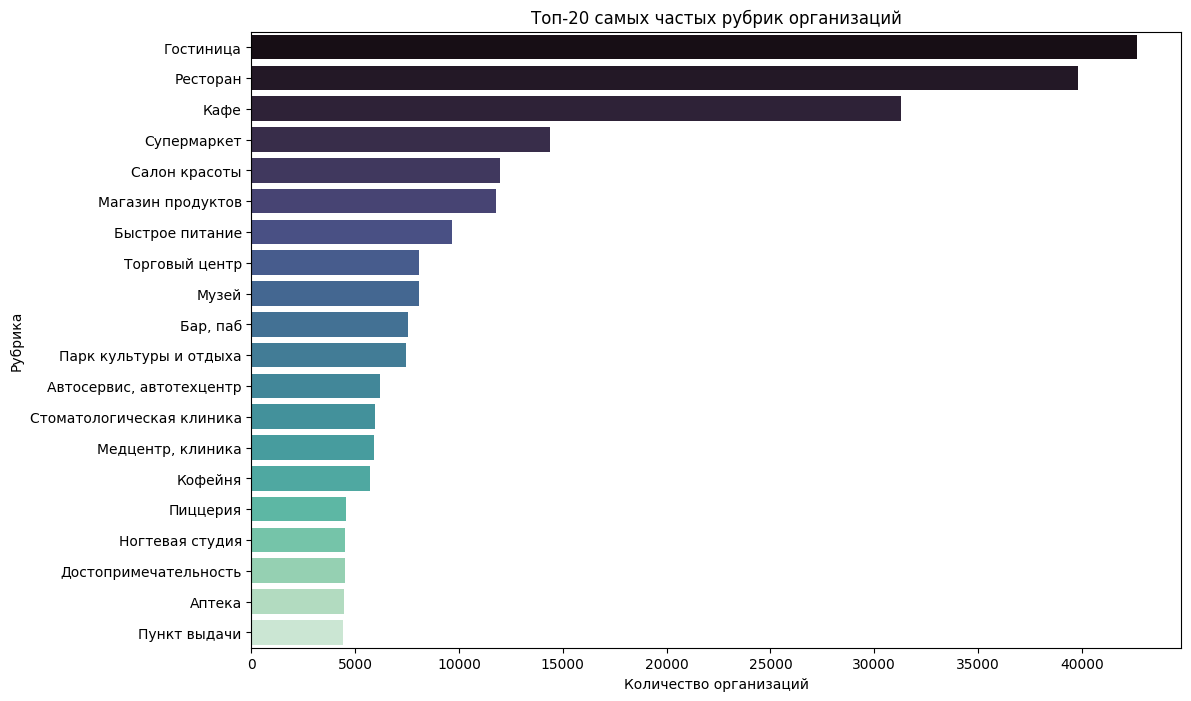

In [86]:
top_rubrics = df_rubrics['main_rubric'].value_counts().nlargest(20)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_rubrics.index, x=top_rubrics.values, palette='mako', hue=top_rubrics.index)
plt.title('–¢–æ–ø-20 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Ä—É–±—Ä–∏–∫ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π')
plt.ylabel('–†—É–±—Ä–∏–∫–∞')
plt.show()

–¢–æ–ø –∏–∑–º–µ–Ω–∏–ª—Å—è. –û—Å—Ç–∞–≤–∏–º –¥–ª—è –æ—Å–Ω–æ–≤–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω–æ–µ –ø–æ–ª–µ, –≥–¥–µ –±—É–¥–µ—Ç –ª–∏—Å—Ç —Ä—É–±—Ä–∏–∫ –∏ –Ω–æ–≤–æ–µ –ø–æ–ª–µ —Å –≥–ª–∞–≤–Ω–æ–π —Ä—É–±—Ä–∏–∫–æ–π

In [88]:
df['rubrics'] = df['rubrics'].str.split(';')
df['main_rubric'] = df['rubrics'].apply(lambda x: x[0])
df.head()

address             name_ru  \
0  –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª. –ú–æ—Å–∫–æ–≤—Å–∫–∞—è / —É–ª. –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫...  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª   
1  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≠–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω...   –ü—Ä–æ–¥—É–∫—Ç—ã –ï—Ä–º–æ–ª–∏–Ω–æ   
2  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ü—Ä–∏–∫—É–±–∞–Ω—Å–∫–∏–π –≤–Ω—É—Ç—Ä–∏–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥,...             LimeFit   
3   –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ø—Ä–æ—Å–ø–µ–∫—Ç –≠–Ω–≥–µ–ª—å—Å–∞, 111, –∫–æ—Ä–ø. 1        Snow-Express   
4                  –¢–≤–µ—Ä—å, –í–æ–ª–æ–∫–æ–ª–∞–º—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 39  –°—Ç—É–¥–∏—è Beauty Brow   

   rating                                            rubrics  \
0     3.0                                   [–ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å]   
1     5.0  [–ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤, –ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫...   
2     1.0                                      [–§–∏—Ç–Ω–µ—Å-–∫–ª—É–±]   
3     4.0    [–ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞, –ü—Ä–æ–∫–∞—Ç –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤, –°–∞–ø—Å—ë—Ä—Ñ–∏–Ω–≥]   
4     5.0  [–°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã, –í–∏–∑–∞–∂–∏—Å—Ç—ã, —Å—Ç–∏–ª–∏—Å—Ç—ã, –°–∞–ª–æ–Ω –±—Ä–æ...   

                                                text        main_rubric  
0  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª 2.\n–®—É–º–Ω–æ : –ª–µ—Ç–æ–º –ø–æ –Ω–æ—á–∞–º ...     –ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å  
1  –ó–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è —Å–µ—Ç—å –º–∞–≥–∞–∑–∏–Ω–æ–≤ –≤ –æ–±—â–µ–º, —Ö–æ—Ä–æ—à–∏–π ...  –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤  
2  –ù–µ –∑–Ω–∞—é —Å–º—É—Ç—è—Ç –ª–∏ –∫–æ–≥–æ-—Ç–æ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞, –Ω–æ —è...        –§–∏—Ç–Ω–µ—Å-–∫–ª—É–±  
3  –•–æ—Ä–æ—à–∏–µ —É—Å–ª–æ–≤–∏—è –∞—Ä–µ–Ω–¥—ã. \n–î—Ä—É–∂–µ–ª—é–±–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª...      –ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞  
4  –¢–æ–ø –º–∞—Å—Ç–µ—Ä –ê–Ω–≥–µ–ª–∏–Ω–∞ —Ç–æ–ø –≤–æ –≤—Å–µ—Ö —Å–º—ã—Å–ª–∞—Ö ) –ù–µ–º–Ω...      –°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã

## –†–µ–π—Ç–∏–Ω–≥

In [89]:
df['rating'].describe()

count    500000.00000
mean          4.48160
std           1.14625
min           0.00000
25%           5.00000
50%           5.00000
75%           5.00000
max           5.00000
Name: rating, dtype: float64

–í–∏–¥–∏–º, —á—Ç–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –æ—Ü–µ–Ω–æ–∫ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∞ –∏ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ —Å—Ç–æ–∏—Ç —É—á–µ—Å—Ç—å –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤

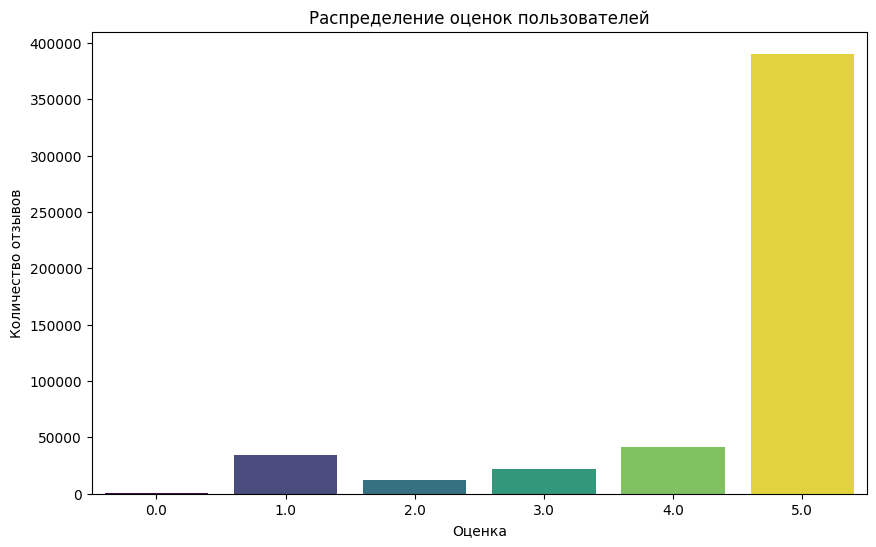

In [92]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='viridis', hue='rating', legend=False)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ü–µ–Ω–æ–∫ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π')
plt.xlabel('–û—Ü–µ–Ω–∫–∞')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤')
plt.show()

## –û—Ç–∑—ã–≤—ã

–°–Ω–∞—á–∞–ª–∞ –ø–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ –≤–æ–æ–±—â–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è–º, –ø–æ—Ç–æ–º—É —á—Ç–æ –Ω–∞–º –±—É–¥–µ—Ç —Å–ª–æ–∂–Ω–æ —á—Ç–æ-—Ç–æ —Å–¥–µ–ª–∞—Ç—å —Å –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–µ–π, –≥–¥–µ 1 –æ—Ç–∑—ã–≤

–°–Ω–∞—á–∞–ª–∞ –ø–æ—Å–º–æ—Ç—Ä–∏–º –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫—É –ø–æ –Ω–∞–∑–≤–∞–Ω–∏—è–º, —Ç–∞–∫ –∫–∞–∫ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏ –º–æ–≥—É—Ç –∏–º–µ—Ç—å –º–Ω–æ–≥–æ —Ñ–∏–ª–∏–∞–ª–æ–≤ (–Ω–∞–ø—Ä–∏–º–µ—Ä –ü—è—Ç–µ—Ä–æ—á–∫–∞) –∏ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –æ—Ç–∑—ã–≤—ã –º–æ–≥—É—Ç –±—ã—Ç—å –≤ —Ü–µ–ª–æ–º –ø—Ä–æ –æ—Ä–≥–∞–Ω–∏–∞–∑—Ü–∏—é, –∞ –Ω–µ –Ω–∞ –¥–∞–Ω–Ω—ã–µ —Ñ–∏–ª–∏–∞–ª